   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

<ipython-input-1-5323b121db18>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
<ipython-input-1-5323b121db18>:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

Accuracy of Decision Tree (simple): 0.75
Accuracy of Decision Tree (max depth 5): 0.79
Accuracy of Logistic Regression: 0.81


<ipython-input-1-5323b121db18>:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette='viridis')


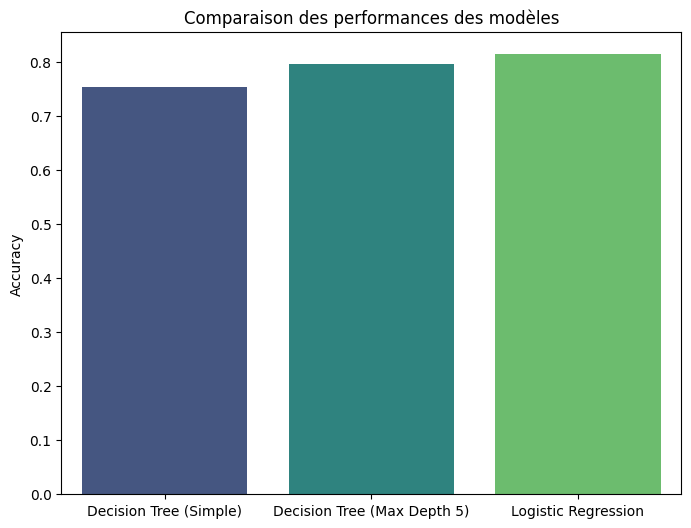

In [1]:
import pandas as pd

# Charger les données d'entraînement et de test
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Afficher les premières lignes de l'ensemble d'entraînement
print(train_data.head())
# Informations générales sur les données d'entraînement
print(train_data.info())

# Statistiques descriptives
print(train_data.describe())

# Vérification des valeurs manquantes
print(train_data.isnull().sum())
# Remplir les valeurs manquantes dans les colonnes "Age" avec la médiane
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)

# Remplir les valeurs manquantes dans la colonne "Embarked" avec la valeur la plus fréquente
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)

# Encoder les variables catégorielles
train_data['Sex'] = train_data['Sex'].map({'male': 0, 'female': 1})
train_data['Embarked'] = train_data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# Sélectionner les colonnes d'intérêt
X = train_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = train_data['Survived']
#model1
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modèle d'arbre de décision simple
model1 = DecisionTreeClassifier(random_state=42)
model1.fit(X_train, y_train)

# Prédictions
y_pred1 = model1.predict(X_test)

# Évaluation
accuracy1 = accuracy_score(y_test, y_pred1)
print(f"Accuracy of Decision Tree (simple): {accuracy1:.2f}")

# Modèle d'arbre de décision avec une profondeur maximale
model2 = DecisionTreeClassifier(max_depth=5, random_state=42)
model2.fit(X_train, y_train)

# Prédictions
y_pred2 = model2.predict(X_test)

# Évaluation
accuracy2 = accuracy_score(y_test, y_pred2)
print(f"Accuracy of Decision Tree (max depth 5): {accuracy2:.2f}")

#compare utilise regression logistique
from sklearn.linear_model import LogisticRegression

# Modèle de régression logistique
model3 = LogisticRegression(max_iter=200, random_state=42)
model3.fit(X_train, y_train)

# Prédictions
y_pred3 = model3.predict(X_test)

# Évaluation
accuracy3 = accuracy_score(y_test, y_pred3)
print(f"Accuracy of Logistic Regression: {accuracy3:.2f}")

import matplotlib.pyplot as plt
import seaborn as sns

# Visualiser les performances des trois modèles
models = ['Decision Tree (Simple)', 'Decision Tree (Max Depth 5)', 'Logistic Regression']
accuracies = [accuracy1, accuracy2, accuracy3]

plt.figure(figsize=(8, 6))
sns.barplot(x=models, y=accuracies, palette='viridis')
plt.title('Comparaison des performances des modèles')
plt.ylabel('Accuracy')
plt.show()




Arbre de décision simple : Ce modèle est susceptible de surapprendre si la profondeur n'est pas contrôlée, ce qui peut mener à une surévaluation de sa performance sur les données d'entraînement.

Arbre de décision avec profondeur limitée : Un modèle plus robuste, qui aide à éviter le surapprentissage et à généraliser mieux.

Régression logistique : Ce modèle peut être utile pour capturer des relations linéaires entre les variables, mais il pourrait ne pas capturer la complexité des données aussi bien que l'arbre de décision.

En fonction des résultats, vous pourrez ajuster les hyperparamètres (comme la profondeur de l'arbre) ou essayer d'autres modèles pour améliorer la précision de vos prédictions.